In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1. Wczytanie zbioru danych
df = pd.read_csv('diabetes.csv')
print(df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

Regresja logistyczna:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]

SVM:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[81 18]
 [19 36]]

k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0

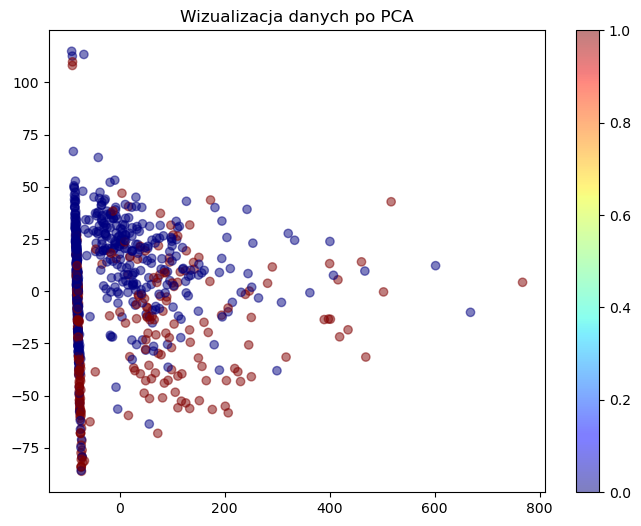

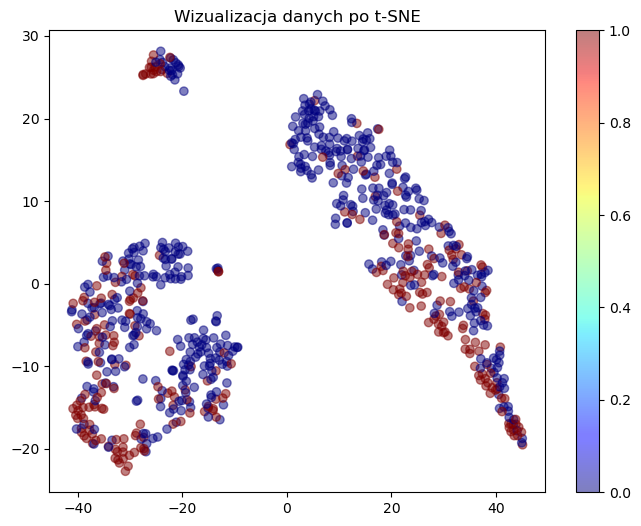

In [7]:
# 2. Przygotowanie danych
X = dane.drop("Outcome", axis=1)  # cechy
y = dane["Outcome"]  # etykiety

# 3. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Trenowanie klasyfikatorów
# Regresja logistyczna
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 6. Predykcja i ocena wyników
print("Regresja logistyczna:")
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("\nSVM:")
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("\nk-Nearest Neighbors:")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 7. Redukcja wymiarowości (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Wizualizacja wyników PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title("Wizualizacja danych po PCA")
plt.show()

# 8. Wizualizacja wyników t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Wizualizacja wyników t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title("Wizualizacja danych po t-SNE")
plt.show()
